
## Scipy-Stats Jupyter Assessment Part 2

### Project tasks outlined : 

1. An overview of the Scipy-Stats Python library 

2. Overview of a one-way ANOVA 

3. Analysis of diets dataset. Download the dataset 

4. Import the diet data set with the function read.csv()

5. Define a new column weight loss = the difference between the initial and final weights

6. Display weight loss per diet type (column diet.type) by means of a boxplot.

7. Perform a one-way ANOVA, respectively by means of the scipy-stats package in python

8. Display and analyze the results: perform a post hoc test
---------------------------------------------------------------------------------------------------------------

### Overview of Scipy-stats Python Library <sup>[1][2]</sup>


Scipy-stats is the statistical functions subpackage containing algorithms of the SciPy library.It is an open sources environment which mean it is constantly been updated. It is used in conjunction with other python packages such as Pandas and Numpy.

The following are just some of its features :

1. ##### **Probabilistic distributions-** 
          This describes all the possible values and likelihoods that a random variable can take within a given range. Continous and discrete random variables have mostly the same basic methods between them
2. ##### **Statistical operations -**
        Summary and Frequency statistics Gives details of the random variable data e,g mean , median and mode or the frequency of this data - how many times a variable data appears.
3. ##### **Statistical Tests-**
        e.g T-tests - showing how significant the differences between data groups , measured in means
4. ##### **Correlation Functions -**
        statistical correlation between random variables. E.g One- Way ANOVA
5. ##### **Kernel density estimation -**
        This is an efficient tool for estimation of the probability density function using histograms as a tool for visualization. The gaussian_kde estimator can be used to estimate both univariate and multivariate data.
6. ##### **Quasi- Monte Carlo functionality -**
        Firstly Monte Carlo integration functionality is a class of algorithms that rely on pseudo-random numbers whereas Quasi Monte Carlo integration uses sub random sequences of numbers which has the advantage of a faster rate of convergence. These are popular in the world of mathematical and computational finance


-----------------------------------------------------------------------------------


### Overview of a One-Way Anova - Correlation Function of Scipy- Stats in Python : <sup>[3]</sup>

<center><img src="https://pingouin-stats.org/_images/flowchart_one_way_ANOVA.svg" width="1000"/><Center>
    
    <center> Ref : https://pingouin-stats.org/guidelines.html <center>

### **Aim**: Using scipy-stats to perform a one- way ANOVA on a dataset example

    
ANOVA stands for Analysis of Variance analysis. It uses F-tests to statistically test the equality of means. Named after Sir Ronald Fisher of the iris dataset fame. It tests the null hypothesis : 


<center><img src="https://statistics.laerd.com/statistical-guides/img/one-way-anova-null-hypothesis.png" alt="drawing" width="500"/><Center>
    
    <center> Ref : https://statistics.laerd.com/statistical-guides/img/one-way-anova-null-hypothesis.png <center>



Where 
     µ = group mean 
     k = number of groups.
     
     
This null hypothesis equation demonstrates that the means are the same , however if after performing a one way anova test and the result is not the case , then we can reject the null hypothesis and the alternative is that the means are statiscally different. 

Also it is important to also realise that after the result to reject the hypothesis we will still not know which diet is the most successful one and therefore we must look at Post hoc tests . According to the schematic diagram above , following a one way anova , the post hoc test to use is the TUKEY-HSD - pairwise_tukey(). 

**Diet Dataset**

We are going to examine a dataset that looks at 3 different diets and their effects on a group of 78 people. We want to see if there is a direct relationship between each of the diets and the calculated weight loss ( if any) of the 78 people.  

The variables looked at are Gender , Age , Height , Preweight , Diet and weight after 6 weeks , the weight loss calculated was also added to the csv file before importing it. The independent variable is diet

Dataset Reference : <sup>[4]</sup>

https://www.sheffield.ac.uk/mash/statistics/datasets

This data set contains information on 78 people using one of three diets:

| Variable Name   	| Variable                        	| Data Type 	|
|-----------------	|---------------------------------	|-----------	|
| People          	| Particular Number               	|           	|
| Gender          	| 1= Male, 0 = Female             	| Binary    	|
| Age             	| Age ( years)                    	| Scale     	|
| Height          	| Height(cm)                      	| Scale     	|
| Preweight       	| Weight before the diet (kg)     	| Scale     	|
| Diet            	| Diet                            	| Binary    	|
| Weight 6 weeks 	| Weight after 6 weeks (kg)      	| Scale     	|

### Importing Libraries

In [ ]:
# Data frames.
import pandas as pd

# Plotting.
import seaborn as sns

# Stats.
import scipy.stats as ss

# Numerical arrays.
import numpy as np

# Collections.
import collections as co

# Specials.
import scipy.special as spec
 
import pylab
import matplotlib.pyplot as plt
# For plotting 
import plotly as py
import plotly.graph_objects as go
from plotly.offline import iplot
import plotly.express as px

import statsmodels.api as sm
from statsmodels.formula.api import ols

### Importing the Database

In [ ]:
df = pd.read_csv(r'C:\Users\User\Desktop\repo\Machine-learning-and-Statistics\Scipy Stats\Diet_R.csv')
df

In [ ]:
#observation size
df.shape[0]   # number of observations

## Correlation Matrix  <sup>[5]</sup>

In [ ]:
df.corr().round (3)

In [ ]:
corr= df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
df.groupby ("Diet")["Weight loss"].describe()

By grouping the diet and weight loss together and running the descibe() on it , we can see that diet 3 is the better diet to do as the mean weight is greater. The standard deviations are similar which can mean that the weight loss between each group is evenly spread out as well. 

### Formulate the hyptheses of the One-Way ANOVA of 'Diet' variable with the 'Weight loss" variable

H₀ (Null hypothesis) — that there is no difference among the 3 diet group weight loss means.
H₁ (Alternate hypothesis) — that at least one diet group weight loss mean differs significantly from the overall mean of the dependent variable.

### The importance of Assumptions in Statistically analysis :<sup>[3]</sup>


In order to perform a one-way ANOVA , we need to make sure that the data is sufficient. By this we mean that it needs to meet 6 assumptions, this would requirement would ensure that the end result of the correlation test would be valid. 
It is possible that some of these assumption might not be met by the choosen data , however there are solutions to overcome this. The data from the diet dataset are examined under each of the assumptions below : 

### Assumption 1: Dependent variable
*************************************

A dependent variable should be measure at a continous interval level. 

Diet dataset dependent variable = Weight loss but also looking that gender as well .

Gender details : 


0 = Female
1= Male


In [ ]:
# The dependent variable.  Gender = Male
dependent= df['Weight loss']
dependent

In [ ]:
# The dependent variable.  Gender = Male
dependentM= df['Weight loss'][df.gender=='1']
dependentM

In [ ]:
# The dependent variable.  Gender = Female
dependentF= df['Weight loss'][df.gender=='0']
dependentF

In [ ]:
dependent.describe()

### Assumption 2: Independent variable
*************************************
This should consist of 2 or more categorical independent groups  : Diet ( 1/2/3) 

In [ ]:
# Independent variable
independent = df['Diet']
independent

In [ ]:
# Independent variable. Gender = Male
independentM = df['Diet'][df.gender=='1']
independentM

In [ ]:
# Independent variable. Gender = Female
independentF = df['Diet'][df.gender=='0']
independentF

### Assumption 3: Independence of Observations


*************************************************

There is no relationship between the observations in each group or between the groups themselves. So for example , each participant in the diet test , should only be on one of the diets. This assumption is true. This should be taken into account at the start or at the design phase before testing. 


### Assumption 4: Outliers <sup>[6][7]</sup>
*************************************************

We draw a box plot to show distributions by breaking down the data in to quartiles. The boxplot shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, then symbols are displayed for outliers that fall outside the whiskers.Outliers are the unusual values in a dataset and can have a negative effect on the ANOVA statistical analysis- leading to distortion of results or unsure findings
Boxplots is a good method if you have multiple distributions

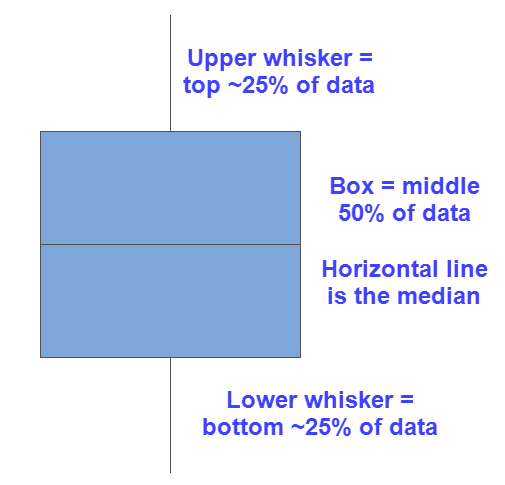! 

What does a boxplot tell us apart from the presence or not of outliers ?

- if a distribution is symmetrical  , the length of the box and whiskers on both sides of the median should be approx equal 
if not the data distribution is skewed



Using the plotly express package in python , we created a boxplot with go.Box from the plotly.graph objects.Its just another way of illustrating the variables


In [ ]:
fig = go.Figure()

fig.add_trace(go.Box(y=df.Age.values, name = "Age"))
fig.add_trace(go.Box(y=df.Height.values, name = "Height"))
fig.add_trace(go.Box(y=df["pre.weight"].values, name = "Start weight"))
fig.add_trace(go.Box(y=df["Weight loss"].values, name = "Finish weight"))

fig.show()

In [ ]:
_ = df.boxplot('Weight loss', by='Diet')

So looking at the box plot of out diet dataset variables , we see that diet 1 and 2 have the same median but diet 2 has more variability . Diet 3 median value is greater than 1 and 2 and has more variability in weight loss. There is also the appearance of 2 outliers for diet 1.

### Assumption 5: Normality <sup>[8]</sup>
*******************************************


Anova assumes that each samples was drawn from a normally distributed population. To check this assumption we look at 2 approaches : 

1. Visually using histograms or Q-Q plots





2. Formal statisticals test : Shapiro-Wilk 

This is the most powerful test when testing for a normal distribution. Developed specifically for the normal distribution. 
Normal distribution is assumed if the P-value >0.05  


In [ ]:
# KDEs of the three categories.
sns.displot(x=dependent, hue=independent, kind="kde")

In [ ]:
# KDEs of the three categories.
sns.displot(x=dependentM, hue=independentM, kind="kde")

In [ ]:
# KDEs of the three categories.
sns.displot(x=dependentF, hue=independentF, kind="kde")

In [ ]:
# Extract the Male weight losses for diet 1.
Weightloss_1 = dependentM[independentM == 1]
Weightloss_1

In [ ]:
# Extract the Female weight losses for diet 1.
Weightloss_1 = dependentF[independentF == 1]
Weightloss_1

In [ ]:
# Extract the male weight losses for diet 2.
Weightloss_2 = dependentM[independentM == 2]
Weightloss_2

In [ ]:
# Extract the Female weight losses for diet 2.
Weightloss_2 = dependentF[independentF == 2]
Weightloss_2

In [ ]:
# Extract the weight losses for diet 3.
Weightloss_3 = dependentM[independentM == 3]
Weightloss_3

In [ ]:
# Extract the Female weight losses for diet 3.
Weightloss_3 = dependentF[independentF == 3]
Weightloss_3

In [ ]:
### Using the Shapiro- Wilk test for normality : <sup>[9]</sup>

Scipy-stats = ss.shapiro 

The hypothese is that the data is normality distributed 

Results : p value > .05  Accept the null hypothesis 
        P value is < 0.05  reject the hypothesis. 

In [ ]:
# Run the Shapiro-Wilk test. 
ss.shapiro(dependent[independent == 1])

In [ ]:
# Run the Shapiro-Wilk test.  
ss.shapiro(dependent[independent == 2])

In [ ]:
# Run the Shapiro-Wilk test.  
ss.shapiro(dependent[independent == 3])

In [ ]:
# Run the Shapiro-Wilk test.  DIET 1 GENDER : MALE
ss.shapiro(dependentM[independentM == 1])

In [ ]:
# Run the Shapiro-Wilk test.  DIET 1 GENDER : FEMALE
ss.shapiro(dependentF[independentF == 1])

In [ ]:
# Run the Shapiro-Wilk test.  DIET 2 GENDER : MALE
ss.shapiro(dependentM[independentM == 2])

In [ ]:
# Run the Shapiro-Wilk test.  DIET 2 GENDER : FEMALE
ss.shapiro(dependentF[independentF == 2])

In [ ]:
# Run the Shapiro-Wilk test.  DIET 3 GENDER : MALE
ss.shapiro(dependentM[independentM == 3])

In [ ]:
# Run the Shapiro-Wilk test.  DIET 3 GENDER : FEMALE
ss.shapiro(dependentF[independentF == 3])

#Overview of Shapiro-Wilks results : 


| Shapiro-wilk Normality test<br> 	| P value 	| Null Hypothesis<br><br>Reject/Accept 	|
|:-------------------------------:	|:-------:	|:------------------------------------:	|
| Diet 1: General                 	| 0.077   	| Accept                               	|
| Diet 2: General                 	| 0.961   	| Accept                               	|
| Diet 3: General                 	| 0.372   	| Accept                               	|
| Diet 1 Male                     	| 0.517   	| Accept                               	|
| Diet 2 Male                     	| 0.647   	| Accept                               	|
| Diet 3 Male                     	| 0.517   	| Accept                               	|
| Diet 1 Female                   	| 0.023   	| Reject                               	|
| Diet 2 Female                   	| 0.966   	| Accept                               	|
| Diet 3 Female                   	| 0.017   	| Reject                               	|

### Conclusion: 

The shapiro-Wilks test for normality shows that there is a normality of results in general distributed , however when looking at the individual diets for the females, we see weight loss results for diet 1 and 3 are rejected however looking at the plots , there is some degree of normality observed. We can overlook this , as the size of the population is not small and all other assumptions are met. 

### Assumption 6: Homogeneity of Variances <sup>[10]</sup>
**************************************************


This is the assumption that all comparison groups have the same variance. If they dont , as long as the group sizes are equal , anova can go ahead a utilize F statistics without the fear of violation of this assumption. If the group sizes are not equal and homogeneity is violated then the F statistic is deemed biased. Large sample variances are associated with small groups sizes , causing the significance level to be underestimated and the null hypothesis to be rejected in error.However if large sample variances are associated with large group sizes , then this leads to overestimated significance level and may in turn lead to reducing the power of the test. 
There are several tests that can be used to test this assumption : Levene;s test . It assesses if the groups have equal variances by using F-test. A p value less than 0.05 indicates a violation of the assumption 

In [ ]:
# Test for equal variances.
ss.levene(
    dependent[independent == 1],
    dependent[independent == 2],
    dependent[independent == 3]
)

The result is greater than 0.05 , therefore equal variances can be assumed and the anova results are valid

### One-way ANOVA <sup>[11]</sup>

*****************************************************************************************************

After examining all the assumptions and concluding that all requirements of each were met by the data  , we can go ahead and perform a one-way ANOVA . We will do this looking at the following : 

Dependent = Weight loss
Independent = Diet type

1. Dependent versus the independent variable for each of the diets without taking gender into account 
2. Dependent versus the independent variable for each of the diets taking gender into account 

Interpretation of results :  

The following rules to determine if the Independent variable has any influence on the dependent variable:
if p < 0.05, this means that the Independent variable has significant influence on the dependent variable : reject the null hypothesis that the mean weight loss for all diets are not the same 

if p > 0.05, this means that the Independent variable has no significant influence on the dependent variable : accept the null hypothesis that the mean weight loss for all diets are same 


In [ ]:
# One- Way ANOVA.: Non gender specific . Weight loss vs Diet type
ss.f_oneway(
    dependent[independent == 1],
    dependent[independent == 2],
    dependent[independent == 3]
)

In [ ]:
# One- Way ANOVA.: gender specific : Female. Weight loss vs Diet type
ss.f_oneway(
    dependentF[independentF == 1],
    dependentF[independentF == 2],
    dependentF[independentF == 3]
)

In [ ]:
# One- Way ANOVA.: gender specific : Male. Weight loss vs Diet type
ss.f_oneway(
    dependentM[independentM == 1],
    dependentM[independentM == 2],
    dependentM[independentM == 3]
)


### Results of the One-Way ANOVA by scipy-stats


| One-Way ANOVA <br><br>Weight loss vs Diet Type 	| P value 	| Null Hypothesis<br><br>Reject/Accept 	|
|:----------------------------------------------:	|:-------:	|:------------------------------------:	|
| General                                        	| 0.0032  	| Reject                               	|
| Male                                           	| 0.8630  	| Accept                               	|
| Female                                         	| 0.0002  	| Reject                               	|

### Conclusion : 
From the analysis  , we can reject the hypothesis that the weight loss means  are the same for each of the diets for the female participants and also for
the population of both male and female together. However we do not know which diet is better for weight loss for the females , and as there is no difference in weight loss for the males , we can just look at completing a post hoc test on the effect of diet on the females only to determine the better diet to use

### Post Hoc testing <sup>[12][13]</sup>

The ANOVA test on the diet dataset told us there was an overall difference between the diet groups for female, but it doesnt tell us which specific diet is better – whereas post hoc tests will. It is advised to complete just one post-hoc test and in this case we are going to use the Tukey's honestly significant difference (HSD) post hoc test as our data met the assumption of homogeneity of variances. 
We will use the statsmodel library to completed the comparison of diets between the female population and then between all peoples

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison

In [ ]:
# Only use female data
df = df[df.gender=='0']

# compare the height between each diet, using 95% confidence interval 
mc = MultiComparison(df['Height'], df['Diet'])
tukey_result = mc.tukeyhsd(alpha=0.05)

print(tukey_result)
print('Unique diet groups: {}'.format(mc.groupsunique))

In [ ]:
# compare the height between each diet, using 95% confidence interval 
mc = MultiComparison(df['weight loss'], df['Diet'])
tukey_result = mc.tukeyhsd(alpha=0.05)

print(tukey_result)
print('Unique diet groups: {}'.format(mc.groupsunique))

We completed a multi comparison using TUKEY HSD : 
    
1. The first comparison took into account the gender as female. early we learned that there was 2 missing data entries for gender in the dataset , so in order to have a complete analysis , we looked at height , as there is a relation between height and weight loss. The results of the post hoc test was that diet 3 showed a different in the weight loss in comparison to diet 1 and 2. It tells us to reject the hypothesis 

2. whereas for the 2nd comparison , we looked at the diets and without taking gender into account. again the results was to reject the null hypothesis for diet 3 , where was a difference in the weight loss. 

In [ ]:
## **References : 

1. https://docs.scipy.org/doc/scipy/reference/stats.html
2. https://scipy-lectures.org/packages/statistics/index.html
3. https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php
4. https://www.sheffield.ac.uk/mash/statistics/datasets - Diet
5. https://www.statology.org/correlation-matrix-python/
6. https://statisticsbyjim.com/basics/graph-groups-boxplots-individual-values
7. https://plotly.com/python/box-plots/
8. https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93
9. https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test
10.https://www.statisticssolutions.com/the-assumption-of-homogeneity-of-variance/
11.https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html
12. https://pythonrepo.com/repo/maximtrp-scikit-posthocs-python-science-and-data-analysis
13.https://www.statsmodels.org/dev/generated/statsmodels.stats.multicomp.pairwise_tukeyhsd.html
